In [415]:
import numpy as np
import pandas as pd
import scipy.stats as sst
import matplotlib.pyplot as plt
import scienceplots
import seaborn as sns
from sciplotlib import style as spstyle

In [416]:
data = pd.read_csv("HCAI.csv")

In [417]:
data = data.drop([data.columns[0], data.columns[1], data.columns[-1]], axis = 1)

In [418]:
cols = ["Age", "Gender", "LLMExp", "Language", "EQ1Exp", "EQ1,1,1", "EQ1,2,1", "EQ1,3,1","EQ2Exp", "EQ2,1,1", "EQ2,2,1", "EQ2,3,1","EQ3Exp", "EQ3,1,1", "EQ3,2,1", "EQ3,3,1","EInf","EQ1,1,2", "EQ1,2,2", "EQ1,3,2", "EQ2,1,2", "EQ2,2,2", "EQ2,3,2", "EQ3,1,2", "EQ3,2,2", "EQ3,3,2","GQ1Exp", "GQ1,1,1", "GQ1,2,1", "GQ1,3,1","GQ2Exp", "GQ2,1,1", "GQ2,2,1", "GQ2,3,1","GQ3Exp", "GQ3,1,1", "GQ3,2,1", "GQ3,3,1","GInf","GQ1,1,2", "GQ1,2,2", "GQ1,3,2", "GQ2,1,2", "GQ2,2,2", "GQ2,3,2", "GQ3,1,2", "GQ3,2,2", "GQ3,3,2"]



In [419]:
data.columns = cols

In [420]:
# For explanation, see: https://stackoverflow.com/questions/67954486/how-to-convert-likert-scale-responses-to-numerical-in-python
replacer = {'Completely disagree': -2, 'Disagree': -1,
            'Neutral': 0,
            'Agree': 1, 'Completely agree': 2}
mapcols = ["EQ1Exp", "EQ1,1,1", "EQ1,2,1", "EQ1,3,1","EQ2Exp", "EQ2,1,1", "EQ2,2,1", "EQ2,3,1","EQ3Exp", "EQ3,1,1", "EQ3,2,1", "EQ3,3,1","EQ1,1,2", "EQ1,2,2", "EQ1,3,2", "EQ2,1,2", "EQ2,2,2", "EQ2,3,2", "EQ3,1,2", "EQ3,2,2", "EQ3,3,2","GQ1Exp", "GQ1,1,1", "GQ1,2,1", "GQ1,3,1","GQ2Exp", "GQ2,1,1", "GQ2,2,1", "GQ2,3,1","GQ3Exp", "GQ3,1,1", "GQ3,2,1", "GQ3,3,1","GQ1,1,2", "GQ1,2,2", "GQ1,3,2", "GQ2,1,2", "GQ2,2,2", "GQ2,3,2", "GQ3,1,2", "GQ3,2,2", "GQ3,3,2"]
data[mapcols] = data[mapcols].replace(replacer)

In [421]:
# calculate trust changes:
data["TD_E1,1"] = data["EQ1,1,2"] - data["EQ1,1,1"]
data["TD_E1,2"] = data["EQ1,2,2"] - data["EQ1,2,1"]

data["TD_E2,1"] = data["EQ2,1,2"] - data["EQ2,1,1"]
data["TD_E2,2"] = data["EQ2,2,2"] - data["EQ2,2,1"]

data["TD_E3,1"] = data["EQ3,1,2"] - data["EQ3,1,1"]
data["TD_E3,2"] = data["EQ3,2,2"] - data["EQ3,2,1"]

data["TD_G1,1"] = data["GQ1,1,2"] - data["GQ1,1,1"]
data["TD_G1,2"] = data["GQ1,2,2"] - data["EQ1,2,1"]

data["TD_G2,1"] = data["GQ2,1,2"] - data["GQ2,1,1"]
data["TD_G2,2"] = data["GQ2,2,2"] - data["GQ2,2,1"]

data["TD_G3,1"] = data["GQ3,1,2"] - data["GQ3,1,1"]
data["TD_G3,2"] = data["GQ3,2,2"] - data["GQ3,2,1"]

In [422]:
data["trustdropsum"] = data[["TD_E1,1","TD_E2,1","TD_E3,1","TD_G1,1","TD_G2,1","TD_G3,1"]].sum(axis = 1, skipna = True)
data["inittrustmean"] =data[["EQ1,1,1","EQ2,1,1","EQ3,1,1","GQ1,1,1","GQ3,1,1","GQ3,1,1"]].sum(axis = 1, skipna = True) / 3

In [423]:
# Mean trust drop is -1.41666
data["meantrustdrop"] = data["trustdropsum"]/3
print(np.mean(data["meantrustdrop"]))
sst.ttest_1samp(data["meantrustdrop"].values, 0)

-0.2777777777777778


Ttest_1sampResult(statistic=-2.3493574694968244, pvalue=0.031150107976240436)

# Analyze trust drops

## Analyze by language

In [424]:
groups = data.groupby("Language")
groups.mean()

,EQ1Exp,"EQ1,1,1","EQ1,2,1",EQ2Exp,"EQ2,1,1","EQ2,2,1",EQ3Exp,"EQ3,1,1","EQ3,2,1","EQ1,1,2",...,"TD_E3,2","TD_G1,1","TD_G1,2","TD_G2,1","TD_G2,2","TD_G3,1","TD_G3,2",trustdropsum,inittrustmean,meantrustdrop
Language,,,,,,,,,,,,,,,,,,,,,
English,-1.7,0.8,0.6,-0.6,0.6,-0.1,-1.1,0.4,-0.2,0.6,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,-0.50,0.60,-0.166667
German,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,-0.5,NaN,-0.625,-0.25,-0.125,-0.125,-1.25,0.75,-0.416667


In [425]:
groups = data.groupby(["Language", "Gender"])
groups.size()

Language  Gender
English   F         2
          M         8
German    F         4
          M         4
dtype: int64

In [426]:
meantrustdrop_eng = data[data["Language"] == "English"]["meantrustdrop"]
meantrustdrop_ger = data[data["Language"] == "German"]["meantrustdrop"]
trustsum_F = data[data["Gender"] == "F"]["meantrustdrop"].values
trustsum_M = data[data["Gender"] == "M"]["meantrustdrop"].values
pval = sst.ttest_ind(meantrustdrop_eng.values, meantrustdrop_ger.values)
print(trustsum_eng.values)

[-0.33333333  0.          0.         -0.66666667  0.         -0.33333333
  0.          0.         -0.33333333  0.        ]


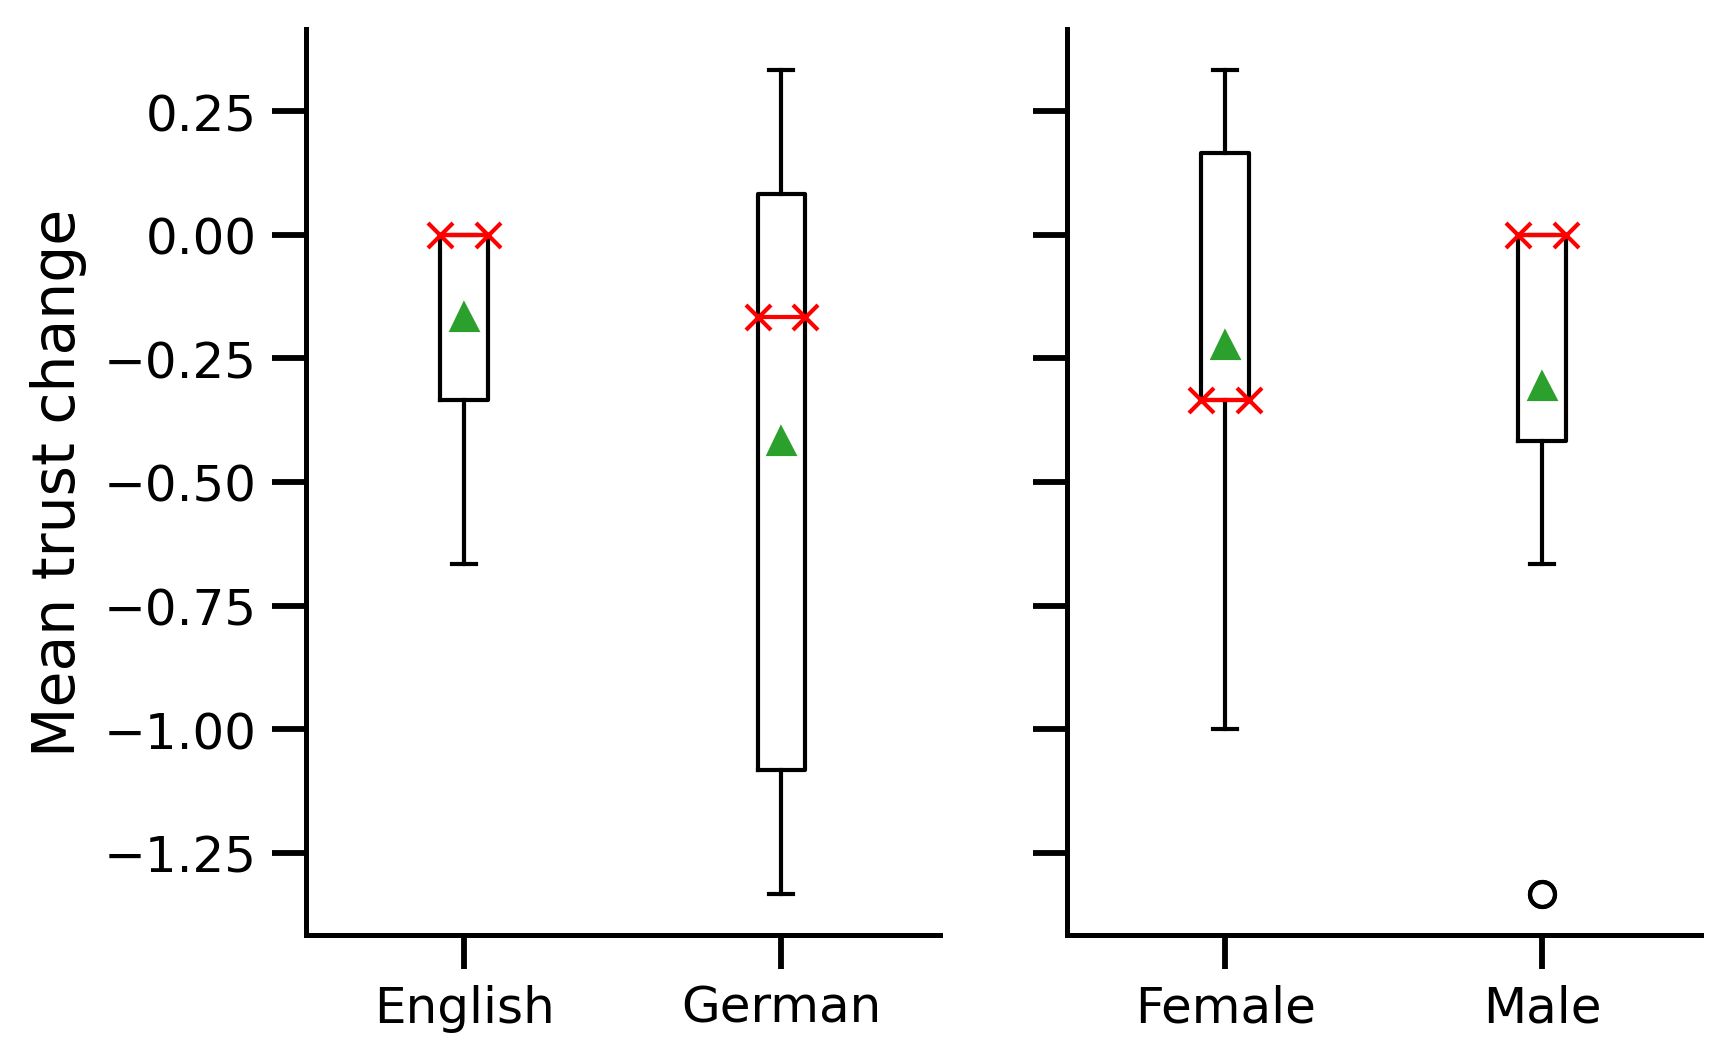

In [427]:
#trustdropbylang = pd.DataFrame({"English":meantrustdrop_eng.values, "German":meantrustdrop_ger.values})
with plt.style.context(spstyle.get_style('nature-reviews')):
    fig, ax = plt.subplots(ncols =2, sharey = True)  

ax[0].boxplot([meantrustdrop_eng.values, meantrustdrop_ger.values], showmeans = True,medianprops = {"color": "red", "marker": "x"})
ax[0].set_ylabel("Mean trust change")
ax[1].boxplot([trustsum_F, trustsum_M], showmeans = True, medianprops = {"color": "red", "marker": "x"})
ax[0].set_xticklabels(["English", "German"])
ax[1].set_xticklabels(["Female", "Male"])
plt.savefig("Boxplot1.png",bbox_inches='tight')
plt.show()

In [428]:
pval

Ttest_indResult(statistic=1.0540925533894596, pvalue=0.30749915559082064)

## Analyze by LLM Experience

In [429]:
groups = data.groupby("LLMExp")
groups.mean()

,EQ1Exp,"EQ1,1,1","EQ1,2,1",EQ2Exp,"EQ2,1,1","EQ2,2,1",EQ3Exp,"EQ3,1,1","EQ3,2,1","EQ1,1,2",...,"TD_E3,2","TD_G1,1","TD_G1,2","TD_G2,1","TD_G2,2","TD_G3,1","TD_G3,2",trustdropsum,inittrustmean,meantrustdrop
LLMExp,,,,,,,,,,,,,,,,,,,,,
Casually tried one or more,-2.000000,-1.000000,-1.0,-1.0,1.000000,0.000000,-2.000000,1.0,0.000000,-1.000000,...,0.000000,1.00,NaN,0.000000,0.000000,0.000000,0.000000,0.0,0.666667,0.000000
Heard of them but haven't tried any,-2.000000,0.000000,0.0,-1.0,0.000000,-1.000000,-1.000000,0.0,-2.000000,0.000000,...,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.000000,0.000000
Occasionally use one or more,-1.500000,0.500000,0.5,-0.5,0.500000,-0.500000,-2.000000,0.0,1.000000,0.000000,...,0.000000,0.00,NaN,-0.333333,-0.666667,0.333333,0.333333,-0.4,0.466667,-0.133333
Regularly use one or more,-1.666667,1.333333,1.0,-0.5,0.666667,0.166667,-0.666667,0.5,-0.333333,1.166667,...,-0.166667,-1.25,NaN,-1.000000,0.000000,-0.500000,-0.500000,-1.3,0.833333,-0.433333


In [430]:
# how much does initial trust vary with LLM Experience
groups_inittrust = groups[["EQ1,1,1", "EQ2,1,1", "EQ3,1,1","GQ1,1,1", "GQ2,1,1", "GQ3,1,1"]]
groups_inittrust.mean()

,"EQ1,1,1","EQ2,1,1","EQ3,1,1","GQ1,1,1","GQ2,1,1","GQ3,1,1"
LLMExp,,,,,,
Casually tried one or more,-1.000000,1.000000,1.0,-1.000000,2.000000,2.000000
Heard of them but haven't tried any,0.000000,0.000000,0.0,NaN,NaN,NaN
Occasionally use one or more,0.500000,0.500000,0.0,0.333333,0.666667,0.666667
Regularly use one or more,1.333333,0.666667,0.5,1.000000,0.500000,0.750000


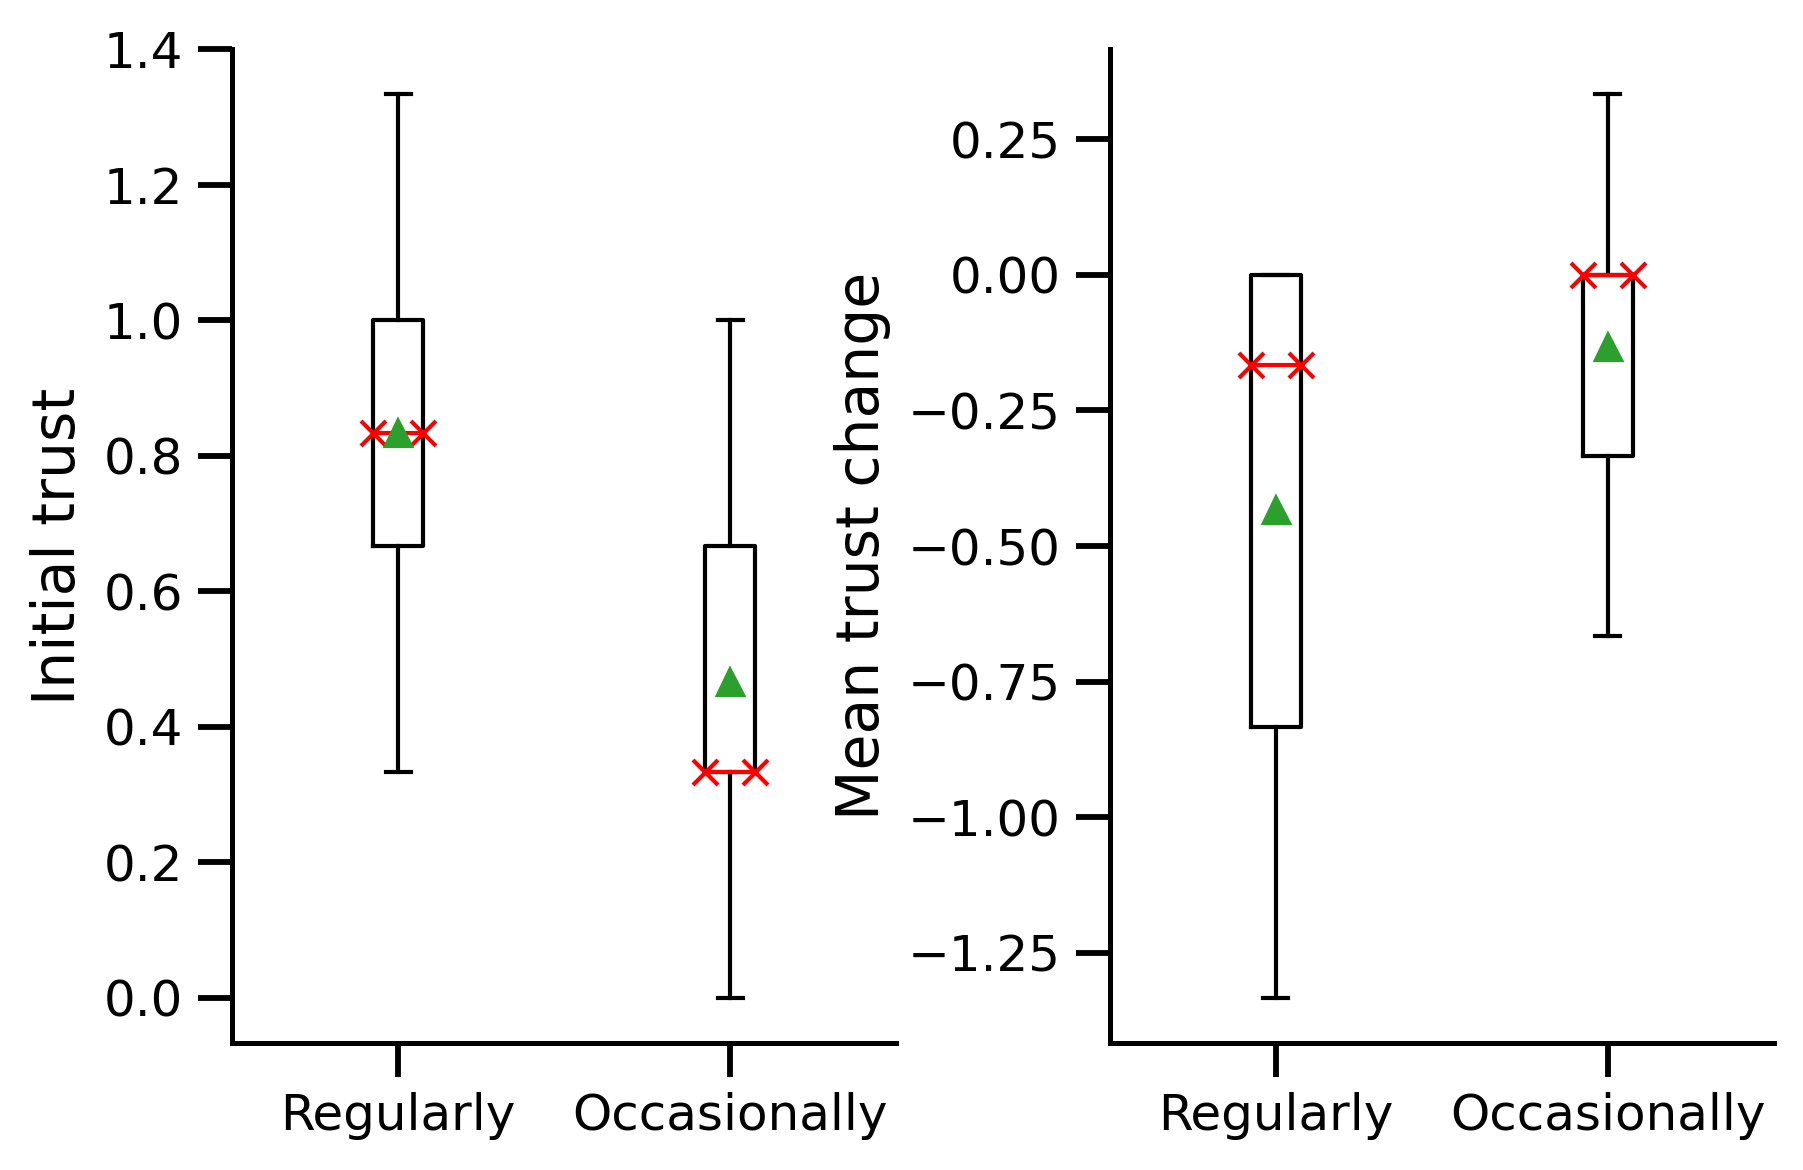

In [431]:
meantrustdrop_exp1 = data[data["LLMExp"] == "Regularly use one or more"]["meantrustdrop"]
meantrustdrop_exp2 = data[data["LLMExp"] == "Occasionally use one or more"]["meantrustdrop"]
inittrustmean_exp1 = data[data["LLMExp"] == "Regularly use one or more"]["inittrustmean"]
inittrustmean_exp2 = data[data["LLMExp"] == "Occasionally use one or more"]["inittrustmean"]
with plt.style.context(spstyle.get_style('nature-reviews')):
    fig, ax = plt.subplots(ncols =2, sharey = False)  

fig.tight_layout()
ax[1].boxplot([meantrustdrop_exp1.values, meantrustdrop_exp2.values], showmeans = True,medianprops = {"color": "red", "marker": "x"})
ax[1].set_ylabel("Mean trust change")
ax[0].set_ylabel("Initial trust")
ax[0].boxplot([inittrustmean_exp1.values, inittrustmean_exp2.values], showmeans = True,medianprops = {"color": "red", "marker": "x"})
ax[1].set_xticklabels(["Regularly", "Occasionally"])
ax[0].set_xticklabels(["Regularly", "Occasionally"])
plt.savefig("Boxplot2.png",bbox_inches='tight')
plt.show()

In [450]:
sst.ttest_ind(meantrustdrop_exp1.values, meantrustdrop_exp2.values)
meantrustdrop_exp2.values

array([-0.66666667,  0.        ,  0.33333333,  0.        , -0.33333333])

In [433]:
sst.ttest_ind(inittrustmean_exp1.values, inittrustmean_exp2.values)

Ttest_indResult(statistic=2.1169509870286274, pvalue=0.05411984835810031)

## Analyze by Gender

In [434]:
groups = data.groupby("Gender")
groups.mean()

,EQ1Exp,"EQ1,1,1","EQ1,2,1",EQ2Exp,"EQ2,1,1","EQ2,2,1",EQ3Exp,"EQ3,1,1","EQ3,2,1","EQ1,1,2",...,"TD_E3,2","TD_G1,1","TD_G1,2","TD_G2,1","TD_G2,2","TD_G3,1","TD_G3,2",trustdropsum,inittrustmean,meantrustdrop
Gender,,,,,,,,,,,,,,,,,,,,,
F,-1.50,0.500,0.500,-1.500,0.500,-0.5,0.000,1.00,-0.500,0.00,...,-0.500,0.0,NaN,-0.25,-0.25,-0.25,-0.25,-0.666667,0.777778,-0.222222
M,-1.75,0.875,0.625,-0.375,0.625,0.0,-1.375,0.25,-0.125,0.75,...,0.125,-1.0,NaN,-1.00,-0.25,0.00,0.00,-0.916667,0.611111,-0.305556


In [435]:
grp =data.groupby(["LLMExp", "Gender"])
grp.size()

LLMExp                               Gender
Casually tried one or more           F         2
Heard of them but haven't tried any  M         1
Occasionally use one or more         F         2
                                     M         3
Regularly use one or more            F         2
                                     M         8
dtype: int64

In [436]:
grp =data.groupby(["LLMExp", "Language"])
grp.size()

LLMExp                               Language
Casually tried one or more           English     1
                                     German      1
Heard of them but haven't tried any  English     1
Occasionally use one or more         English     2
                                     German      3
Regularly use one or more            English     6
                                     German      4
dtype: int64

In [437]:
trustsum_F = data[data["Gender"] == "F"]["meantrustdrop"].values
trustsum_M = data[data["Gender"] == "M"]["meantrustdrop"].values
pval = sst.ttest_ind(trustsum_F, trustsum_M)
pval

Ttest_indResult(statistic=0.3233808333817772, pvalue=0.750595005102984)

## Analyze by task familiarity

In [438]:
# how much does experience correlate with initial trust?
expcols = ["EQ1Exp", "EQ2Exp", "EQ3Exp","GQ1Exp", "GQ2Exp", "GQ3Exp"]
exps = np.array([])
for i in expcols:
    exps = np.concatenate((exps, data[i].values))
exps = exps[~np.isnan(exps)]

initrustcols = ["EQ1,1,1", "EQ2,1,1", "EQ3,1,1","GQ1,1,1", "GQ2,1,1", "GQ3,1,1"]
initrust = np.array([])
for i in initrustcols:
    initrust = np.concatenate((initrust, data[i].values))
initrust = initrust[~np.isnan(initrust)]

sst.pearsonr(exps, initrust)

(0.09291257953866462, 0.50398227595497)

In [439]:
# how much does experience correlate with trust drop?
expcols = ["EQ1Exp", "EQ2Exp", "EQ3Exp","GQ1Exp", "GQ2Exp", "GQ3Exp"]
exps = np.array([])
for i in expcols:
    exps = np.concatenate((exps, data[i].values))
exps = exps[~np.isnan(exps)]

trustdropcols = ["TD_E1,1", "TD_E2,1", "TD_E3,1","TD_G1,1", "TD_G2,1", "TD_G3,1"]
trustdrop = np.array([])
for i in trustdropcols:
    trustdrop = np.concatenate((trustdrop, data[i].values))
trustdrop = trustdrop[~np.isnan(trustdrop)]

sst.pearsonr(exps, trustdrop)

(0.12485686488196979, 0.36835161375844444)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


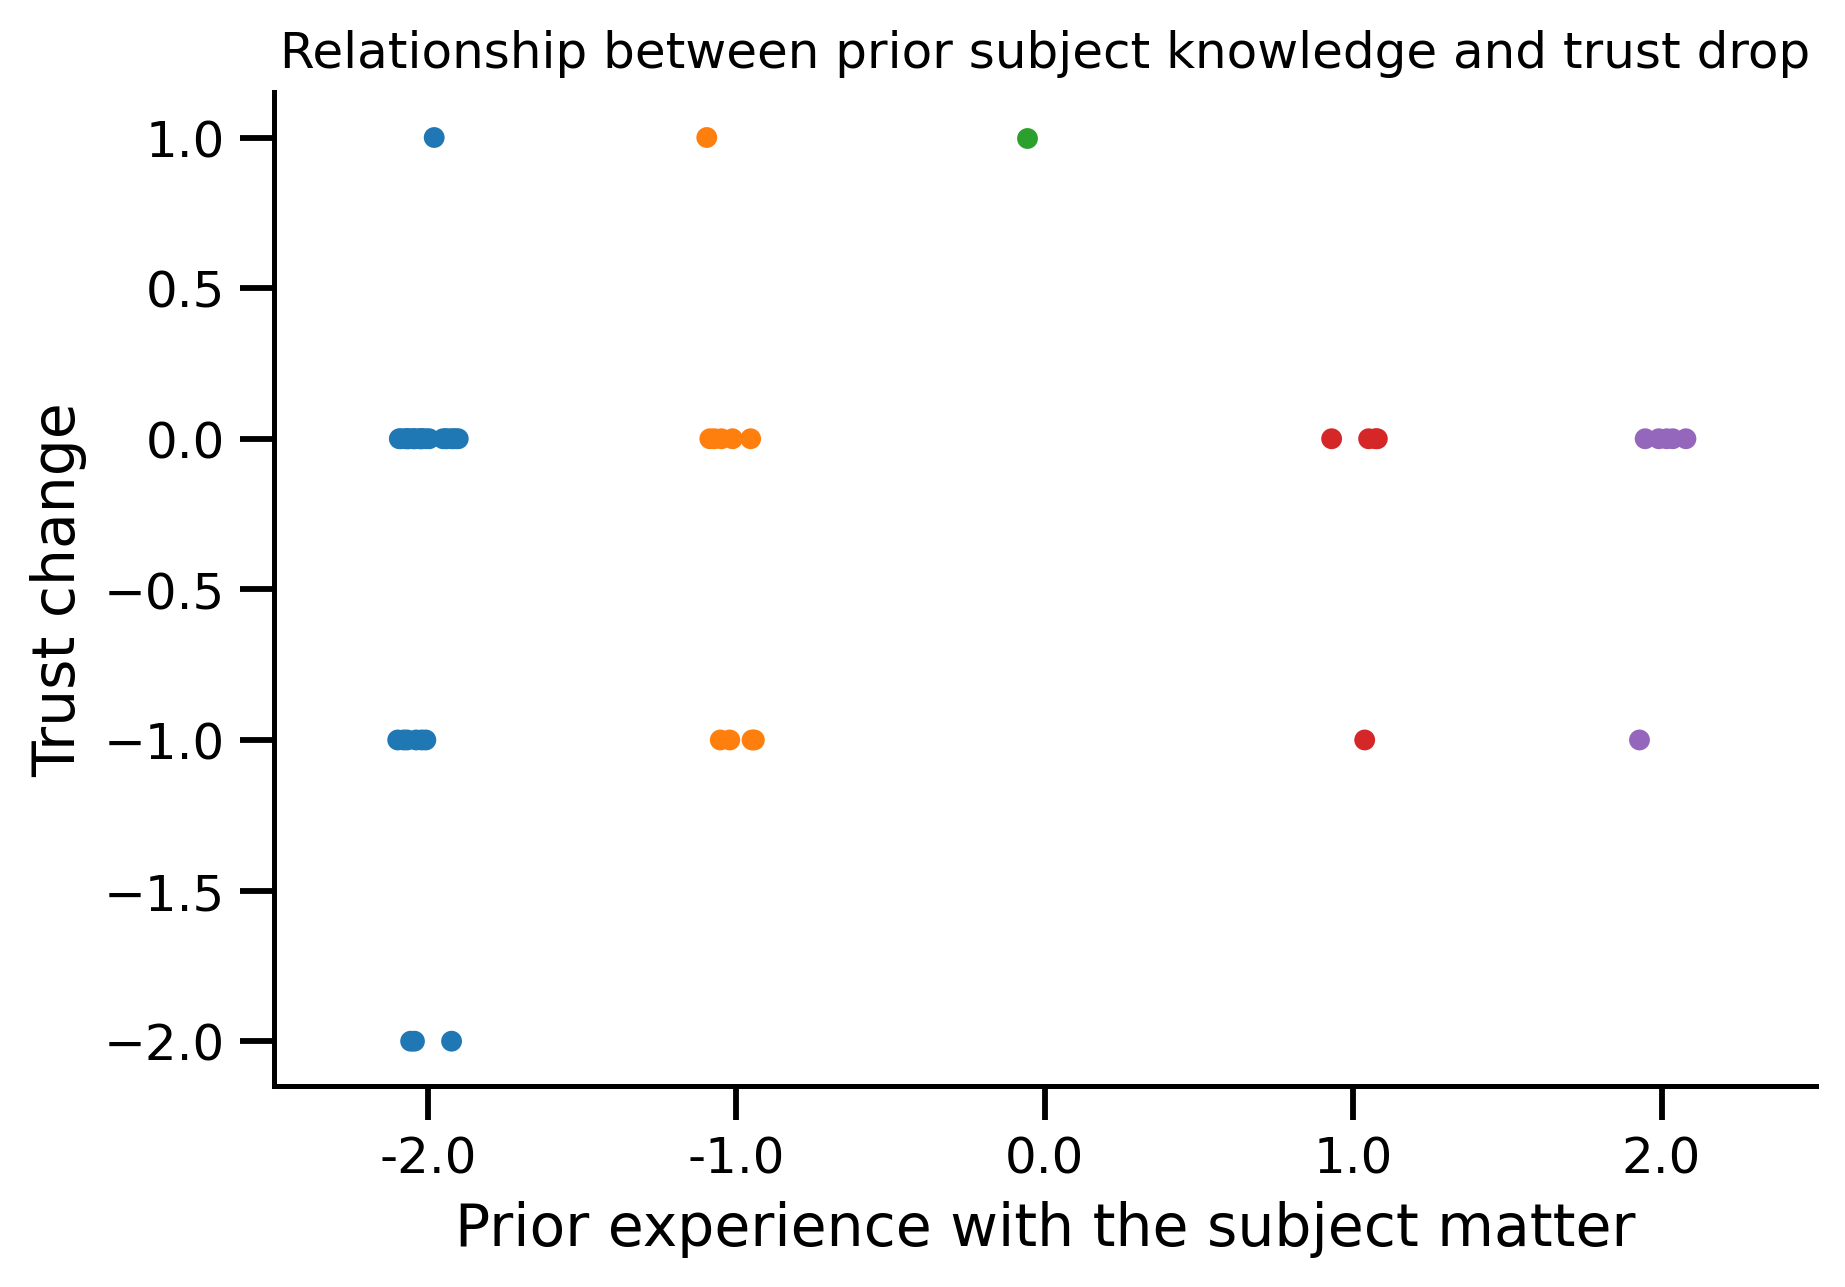

In [440]:
with plt.style.context(spstyle.get_style('nature-reviews')):
    fig, ax = plt.subplots(1)  
#ax.scatter(trustdrop, exps, alpha = 0.5, )
plt.tight_layout()
sns.stripplot(exps, trustdrop, jitter = True)
plt.xlabel("Prior experience with the subject matter")
plt.ylabel("Trust change")
plt.title("Relationship between prior subject knowledge and trust drop")
plt.savefig("scatterplot.png",bbox_inches='tight')
plt.show()

## Analyze initial trust by question

In [441]:
# Q1
q1cols = ["EQ1,1,1","GQ1,1,1"]
q1_initrust = np.array([])
for i in q1cols:
    q1_initrust = np.concatenate((q1_initrust, data[i].values))
q1_initrust = q1_initrust[~np.isnan(q1_initrust)]
np.mean(q1_initrust)

0.6666666666666666

In [442]:
# Q2
q2cols = ["EQ2,1,1","GQ2,1,1"]
q2_initrust = np.array([])
for i in q2cols:
    q2_initrust = np.concatenate((q2_initrust, data[i].values))
q2_initrust = q2_initrust[~np.isnan(q2_initrust)]
np.mean(q2_initrust)

0.6666666666666666

In [443]:
# Q3
q3cols = ["EQ3,1,1","GQ3,1,1"]
q3_initrust = np.array([])
for i in q3cols:
    q3_initrust = np.concatenate((q3_initrust, data[i].values))
q3_initrust = q3_initrust[~np.isnan(q3_initrust)]
np.mean(q3_initrust)

0.6111111111111112

## Analyze trust drop by question

In [444]:
# Q1
q1cols = ["TD_E1,1", "TD_G1,1"]
q1_initrust1 = np.array([])
for i in q1cols:
    q1_initrust1 = np.concatenate((q1_initrust1, data[i].values))
q1_trustdrop = q1_initrust1[~np.isnan(q1_initrust1)]
np.mean(q1_trustdrop)

-0.3333333333333333

In [445]:
# Q2
q1cols = ["TD_E2,1", "TD_G2,1"]
q1_initrust2 = np.array([])
for i in q1cols:
    q1_initrust2 = np.concatenate((q1_initrust2, data[i].values))
q2_trustdrop = q1_initrust2[~np.isnan(q1_initrust2)]
np.mean(q2_trustdrop)

-0.3888888888888889

In [446]:
# Q3
q1cols = ["TD_E3,1", "TD_G3,1"]
q1_initrust3 = np.array([])
for i in q1cols:
    q1_initrust3 = np.concatenate((q1_initrust3, data[i].values))
q3_trustdrop = q1_initrust3[~np.isnan(q1_initrust3)]
np.mean(q3_trustdrop)

-0.1111111111111111

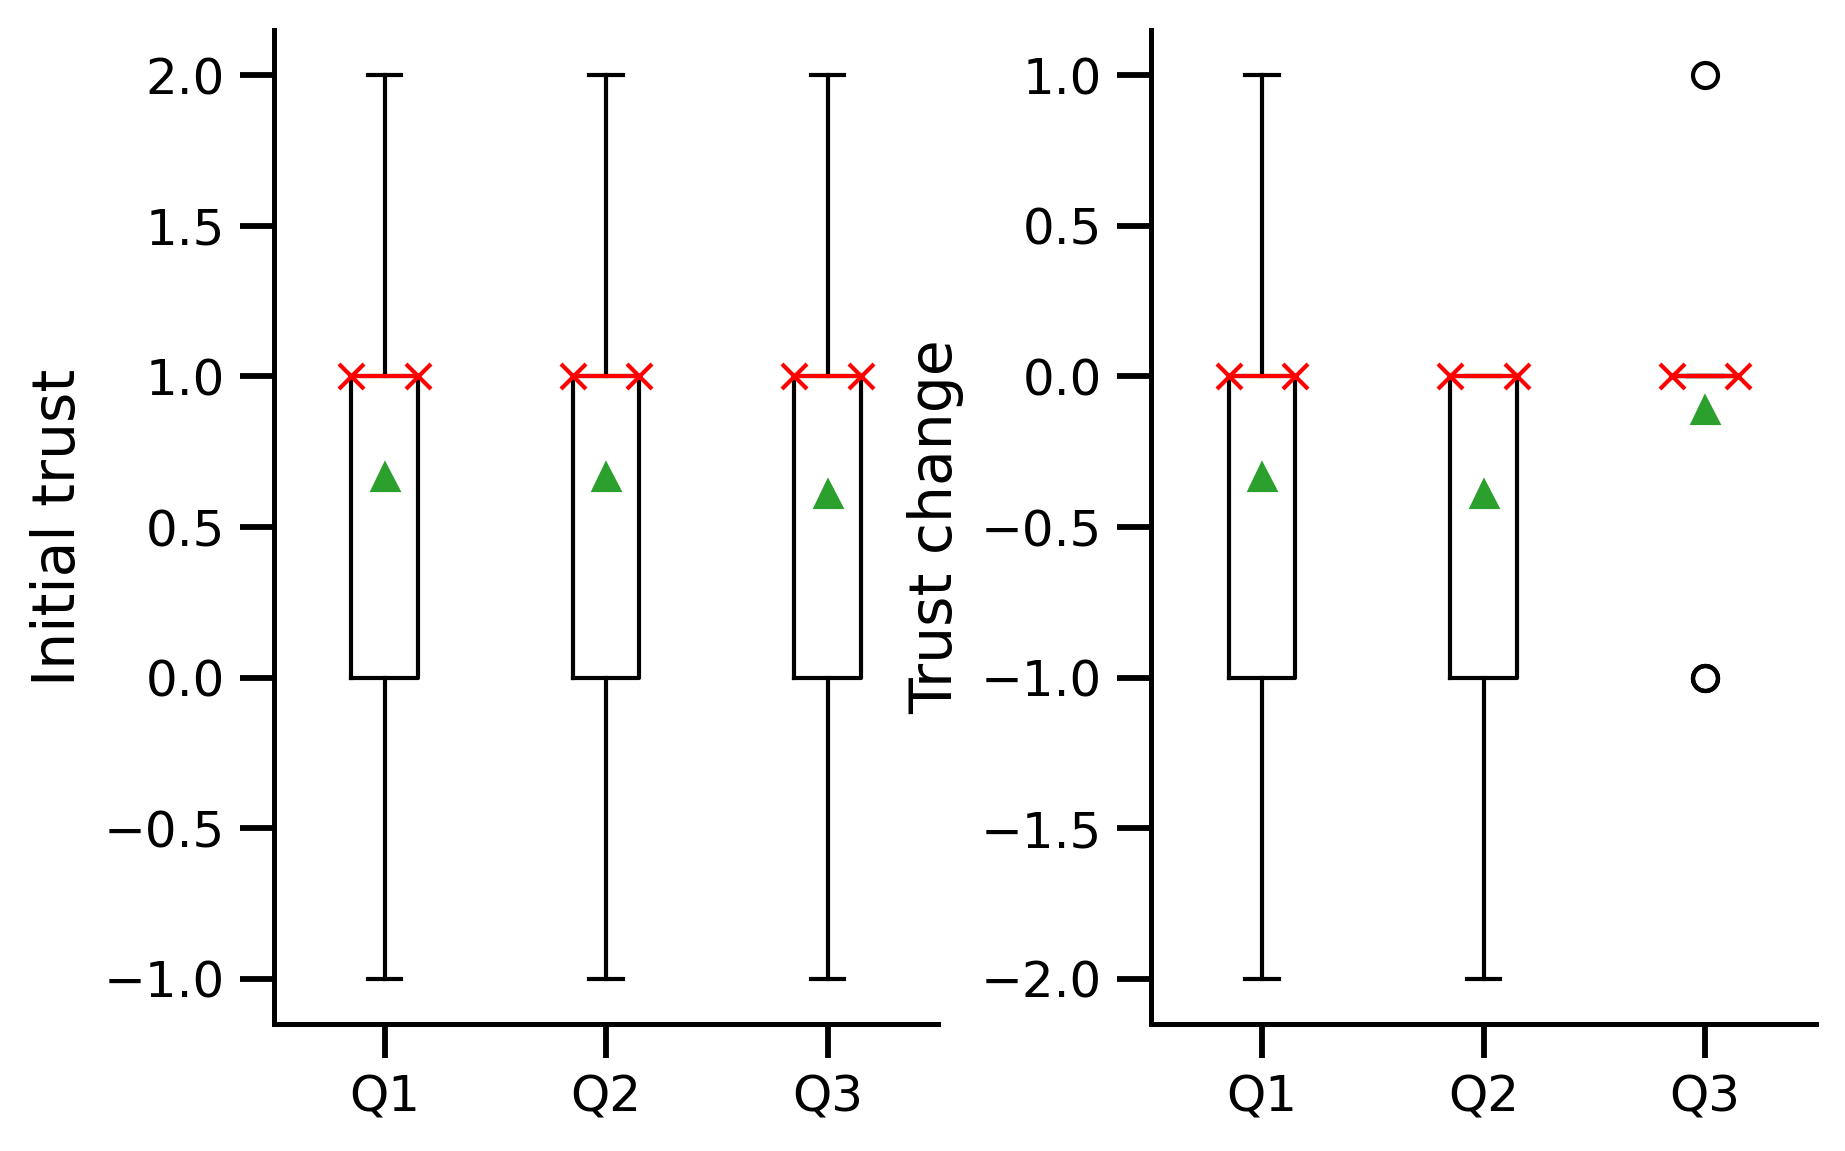

In [447]:
with plt.style.context(spstyle.get_style('nature-reviews')):
    fig, ax = plt.subplots(ncols =2, sharey = False)  

fig.tight_layout()
ax[0].boxplot([q1_initrust,q2_initrust,q3_initrust], showmeans = True,medianprops = {"color": "red", "marker": "x"})
ax[1].set_ylabel("Trust change")
ax[0].set_ylabel("Initial trust")
ax[1].boxplot([q1_trustdrop,q2_trustdrop,q3_trustdrop], showmeans = True,medianprops = {"color": "red", "marker": "x"})
ax[0].set_xticklabels(["Q1", "Q2","Q3"])
ax[1].set_xticklabels(["Q1", "Q2","Q3"])
plt.savefig("Boxplot3.png",bbox_inches='tight')
plt.show()

In [448]:
q1q2 = np.concatenate((q1_trustdrop,q2_trustdrop))
pval = sst.ttest_ind(q1q2,q3_trustdrop)

In [449]:
pval

Ttest_indResult(statistic=-1.3289235252071718, pvalue=0.18967515947145694)